# **Agricultural drought in central South America**

In [1]:
source("../methods_extRemes.r")

## **Model selection**

### **Choice of distribution**

In [45]:
lnorm_fit <- sapply(c("chirps", "cpc", "mswep"), function(ens) {
    
    df <- read.csv(paste0("ts/CSA-drought_pr-ond_",ens,".dat"), comment.char = "#", header = F, sep = " ", col.names = c("year", "precip"))
    gmst <- read.fwf("/home/clair/wwa/90_data/gmst.dat", comment.char = "#", widths = c(5,15), col.names = c("year", "gmst"))
    df <- merge(gmst, df)
    row.names(df) <- df$year
    
    event_year <- max(df$year)
    event_gmst <- gmst[gmst$year == event_year, "gmst"]
    event_value <- df[df$year == event_year, "precip"]
    y <- which(df$year == event_year)
    
    df$logprecip <- log10(df$precip)
    
    nmdl <- fnorm("precip", "gmst", df, type = "fixeddisp", method = "MLE")
    fmdl <- fnorm("logprecip", "gmst", df, type = "fixeddisp", method = "MLE")
    gmdl <- fgamma("precip", "gmst", df, type = "fixeddisp", method = "MLE")
    
    rbind(cbind(dataset = ens, model = "normal", fit_results(nmdl, event_value, event_gmst, event_gmst - 1.2, lower = T, dI_rel = T)),
          cbind(dataset = ens, model = "lognormal", fit_results(fmdl, log10(event_value), event_gmst, event_gmst - 1.2, lower = T, dI_rel = T)),
          cbind(dataset = ens, model = "gamma", fit_results(gmdl, event_value, event_gmst, event_gmst - 1.2, lower = T, dI_rel = T)))
}, simplify = F)

In [46]:
res <- rbind.fill(lnorm_fit)
cbind(res[,1:2], round(res[,c(5,6,7,8,9,10)], 3))

---
### **gamma shift/scale fitted models (for reference only)**
_Note: Gamma dispersion parameter depends on shape parameter - to break this, it may be necessary to allow shape to vary_

In [18]:
ens <- "chirps"

lower.tail <- T
df <- read.csv(paste0("ts/CSA-drought_spi-ond_",ens,".dat"), comment.char = "#", header = F, sep = " ", col.names = c("year", "spi"))
gmst <- read.fwf("/home/clair/wwa/90_data/gmst.dat", comment.char = "#", widths = c(5,15), col.names = c("year", "gmst"))
df <- merge(gmst, df)
row.names(df) <- df$year

event_year <- max(df$year)
event_gmst <- gmst[gmst$year == event_year, "gmst"]
event_value <- df[df$year == event_year, "spi"]
y <- which(df$year == event_year)

In [10]:
gamma_models <- sapply(c("fixeddisp", "shift", "scale", "shiftscale"), function(mtype) fgamma("spi", "gmst", df, type = mtype, method = "MLE", optim.method = "BFGS"), simplify = F)
rbind.fill(lapply(gamma_models, fit_results, event_value, event_gmst, event_gmst - 1.2, lower = T, dI_rel = T))

ERROR: Error in `[.data.frame`(data, , x): undefined columns selected


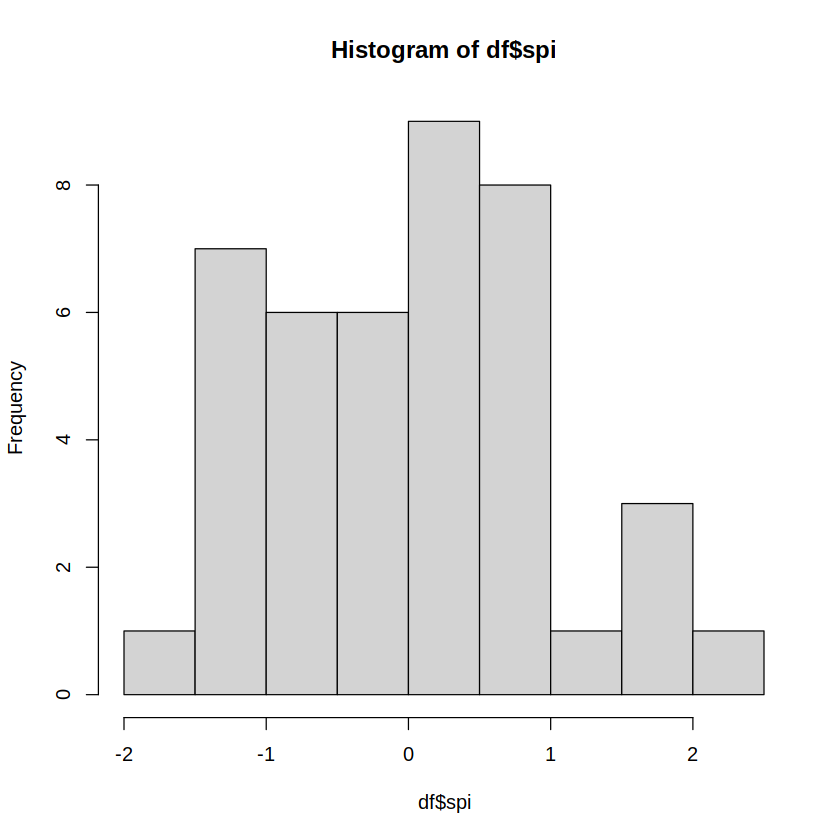

In [25]:
hist(df$spi)

In [53]:
ens <- "cpc"

lower.tail <- T
df <- read.csv(paste0("ts/CSA-drought_pr-ond_",ens,".dat"), comment.char = "#", header = F, sep = " ", col.names = c("year", "precip"))
gmst <- read.fwf("/home/clair/wwa/90_data/gmst.dat", comment.char = "#", widths = c(5,15), col.names = c("year", "gmst"))
df <- merge(gmst, df)
row.names(df) <- df$year

event_year <- max(df$year)
event_gmst <- gmst[gmst$year == event_year, "gmst"]
event_value <- df[df$year == event_year, "precip"]
y <- which(df$year == event_year)

In [54]:
gamma_models <- sapply(c("fixeddisp", "shift", "scale", "shiftscale"), function(mtype) fgamma("precip", "gmst", df, type = mtype, method = "MLE", optim.method = "BFGS"), simplify = F)
rbind.fill(lapply(gamma_models, fit_results, event_value, event_gmst, event_gmst - 1.2, lower = T, dI_rel = T))

mdl,converged,event_value,alpha,loglik,rp_event,rp_alt,pr,delta_I,beta
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
gamma_fixeddisp,0,2.279685,-0.53789816,47.11360,28.03225,Inf,Inf,-24.681968,NA
gamma_shift,0,2.279685,-0.74854336,46.77515,18.20645,Inf,Inf,-16.298501,NA
gamma_scale,1,2.279685,-0.05832929,47.56204,25.06758,265.4851,10.59078,-23.210880,NA
gamma_shiftscale,1,2.279685,-1.22755366,46.67038,13.39699,Inf,Inf,-4.819084,-1.227554


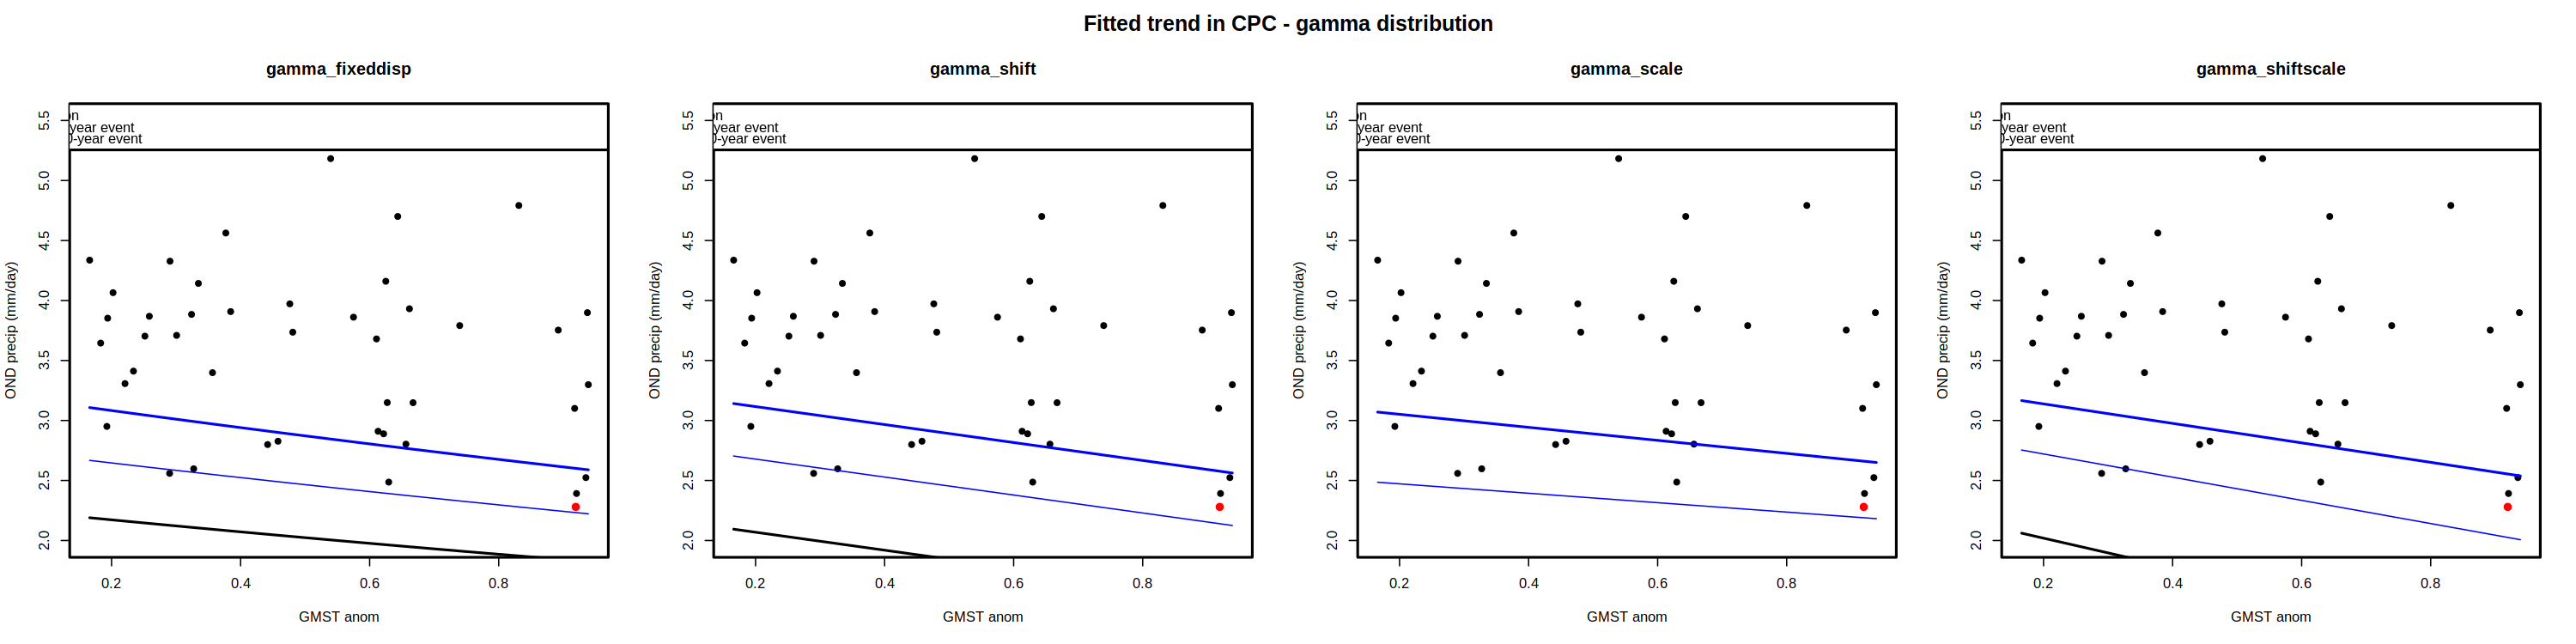

In [55]:
options(repr.plot.width = 5*4, repr.plot.height = 5*1, repr.plot.res = 150)
par(mfrow = c(1,4), oma = c(0,0,2,0), lwd = 2, pch = 20)

invisible(lapply(gamma_models, function(mdl) plot_gmsttrend(mdl, lower = T, ylab = "OND precip (mm/day)", xlab = "GMST anom", ylim = c(2,5.5), main = mdl$type)))
mtext(paste0("Fitted trend in ",toupper(ens)," - gamma distribution"), outer = T, font = 2)

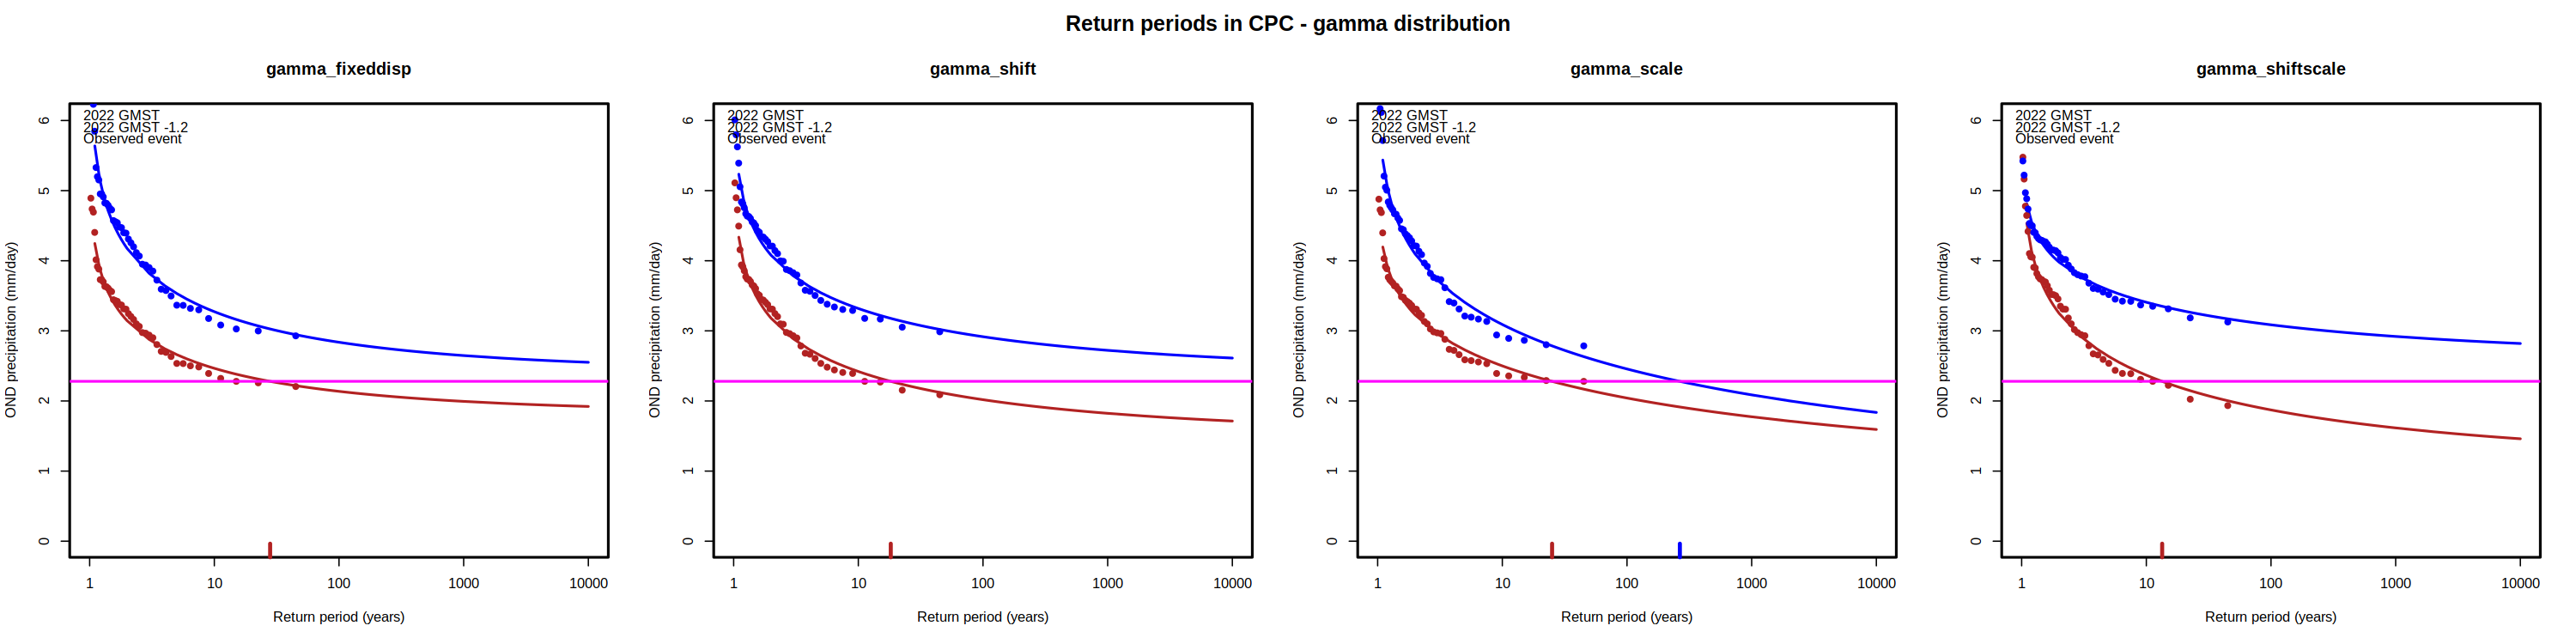

In [56]:
options(repr.plot.width = 5*4, repr.plot.height = 5*1, repr.plot.res = 150)
par(mfrow = c(1,4), oma = c(0,0,2,0), lwd = 2, pch = 20)

invisible(lapply(gamma_models, function(mdl) plot_returnperiods(mdl, event_gmst, event_gmst-1.2, event_value, lower = T, ylim = c(0,6), ylab = "OND precipitation (mm/day)", main = mdl$type)))
mtext(paste0("Return periods in ",toupper(ens)," - gamma distribution"), outer = T, font = 2)

### **Choice of relationship with GMST**

In [31]:
source("../methods_extRemes.r")
ens <- "cpc"

df <- read.csv(paste0("ts/CSA-drought_pr-ond_",ens,".dat"), comment.char = "#", header = F, sep = " ", col.names = c("year", "precip"))
gmst <- read.fwf("/home/clair/wwa/90_data/gmst.dat", comment.char = "#", widths = c(5,15), col.names = c("year", "gmst"))
df <- merge(gmst, df)
row.names(df) <- df$year
    
event_year <- max(df$year)
event_gmst <- gmst[gmst$year == event_year, "gmst"]
event_value <- df[df$year == event_year, "precip"]
y <- which(df$year == event_year)
    
df$logprecip <- log10(df$precip)

In [32]:
lnorm_models <- sapply(c("fixeddisp", "shift", "scale", "shiftscale"), function(mtype) fnorm("logprecip", "gmst", df, type = mtype, method = "MLE", optim.method = "BFGS"), simplify = F)
rbind.fill(lapply(lnorm_models, fit_results, log10(event_value), event_gmst, event_gmst - 1.2, lower = T, dI_rel = T))

mdl,converged,event_value,alpha,loglik,rp_event,rp_alt,pr,delta_I,beta
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
norm_fixeddisp,0,0.3578748,-0.08046000,-43.96229,32.34395,1.674184e+02,5.176189e+00,-15.220202,NA
norm_shift,0,0.3578748,-0.09139964,-44.45812,22.78190,6.339168e+02,2.782546e+01,-14.274956,NA
norm_scale,0,0.3578748,0.07578893,-44.50551,18.80373,4.590034e+10,2.441024e+09,24.474864,NA
norm_shiftscale,0,0.3578748,-0.07513204,-45.35159,12.34076,1.605620e+10,1.301070e+09,2.025043,-0.07513204


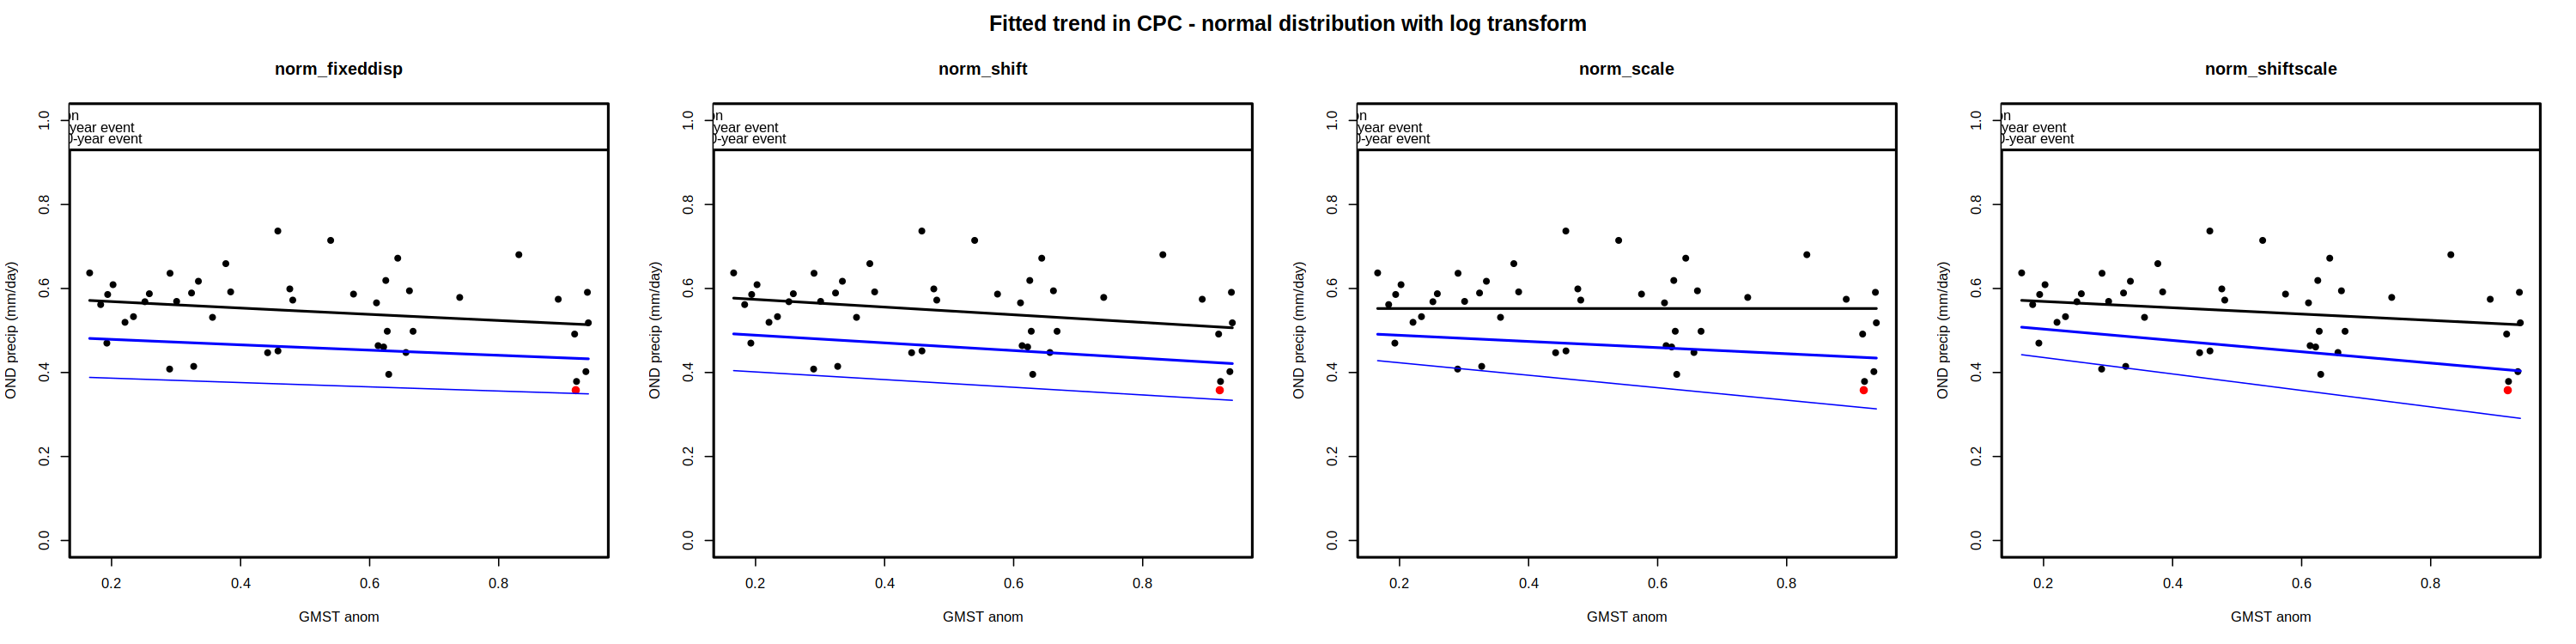

In [34]:
options(repr.plot.width = 5*4, repr.plot.height = 5*1, repr.plot.res = 150)
par(mfrow = c(1,4), oma = c(0,0,2,0), lwd = 2, pch = 20)

invisible(lapply(lnorm_models, function(mdl) plot_gmsttrend(mdl, lower = T, ylab = "OND precip (mm/day)", xlab = "GMST anom", ylim = c(0,1), main = mdl$type)))
mtext(paste0("Fitted trend in ",toupper(ens)," - normal distribution with log transform"), outer = T, font = 2)

Warning message in rug(return_period(mdl, event_value, cov2, lower = lower), lwd = 3, :
“some values will be clipped”
Warning message in rug(return_period(mdl, event_value, cov2, lower = lower), lwd = 3, :
“some values will be clipped”


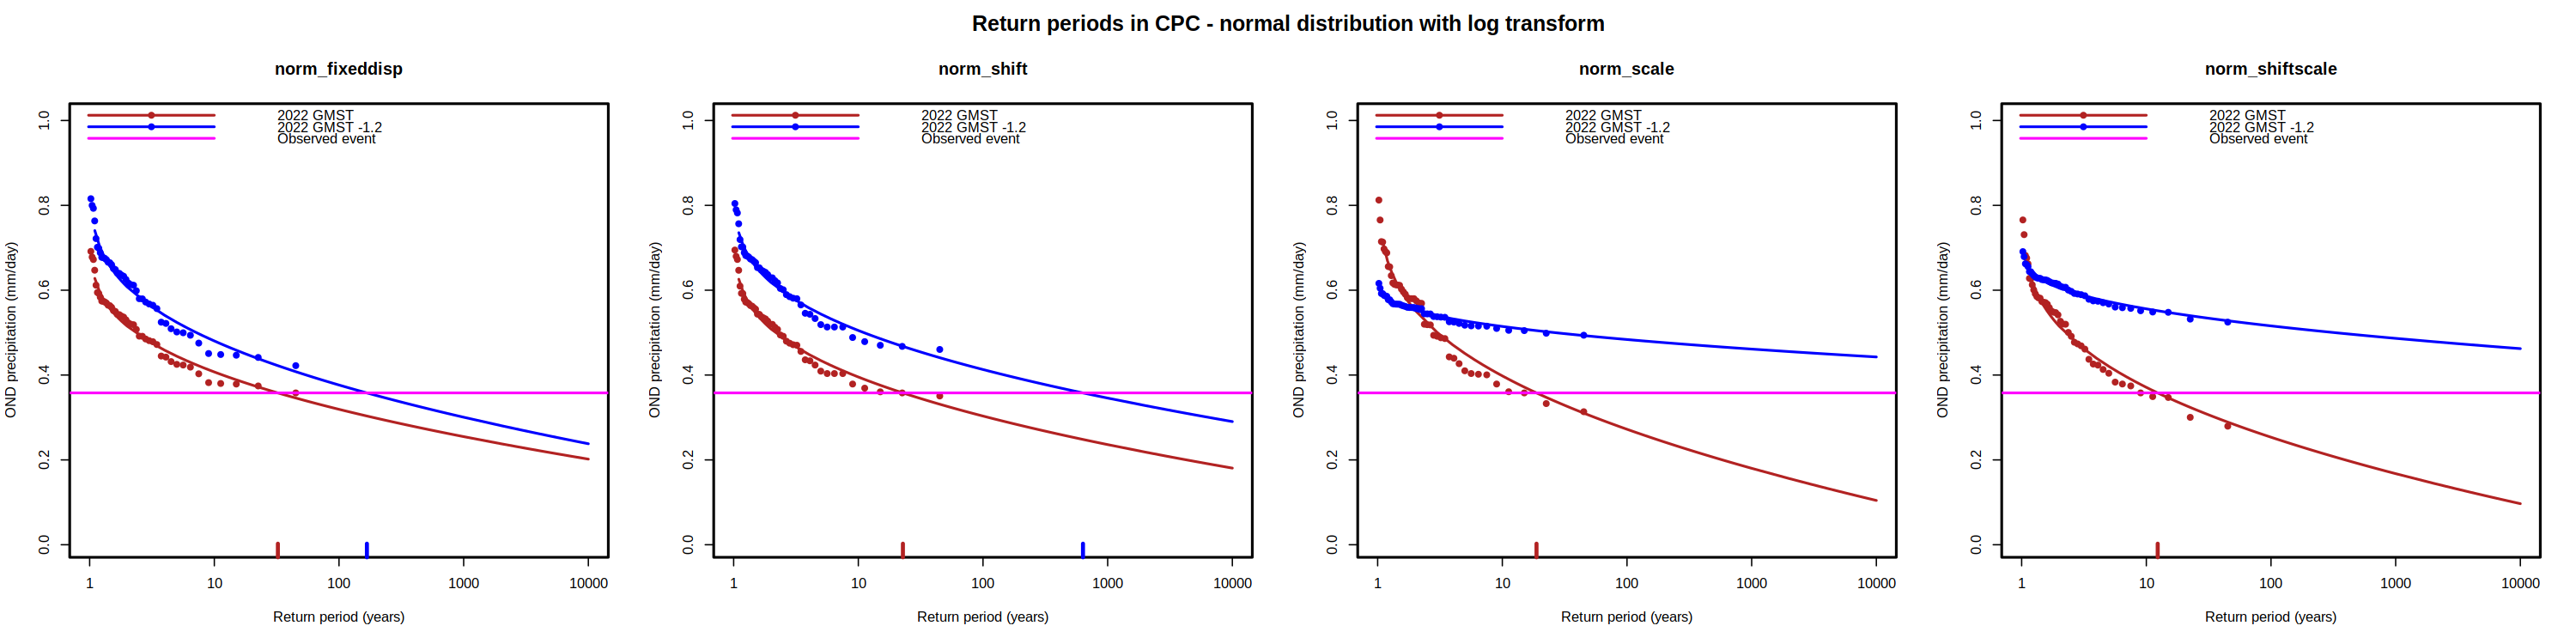

In [38]:
options(repr.plot.width = 5*4, repr.plot.height = 5*1, repr.plot.res = 150)
par(mfrow = c(1,4), oma = c(0,0,2,0), lwd = 2, pch = 20)

invisible(lapply(lnorm_models, function(mdl) plot_returnperiods(mdl, event_gmst, event_gmst-1.2, log10(event_value), lower = T, ylim = c(0,1), ylab = "OND precipitation (mm/day)", main = mdl$type, legend_pos = "topleft")))
mtext(paste0("Return periods in ",toupper(ens)," - normal distribution with log transform"), outer = T, font = 2)

### **Effect of log base**

In [28]:
# makes very little difference:
rbind.fill(sapply(c("chirps", "cpc", "mswep"), function(ens) {
    
    df <- read.csv(paste0("ts/CSA-drought_pr-ond_",ens,".dat"), comment.char = "#", header = F, sep = " ", col.names = c("year", "precip"))
    gmst <- read.fwf("/home/clair/wwa/90_data/gmst.dat", comment.char = "#", widths = c(5,15), col.names = c("year", "gmst"))
    df <- merge(gmst, df)
    row.names(df) <- df$year
    
    event_year <- max(df$year)
    event_gmst <- gmst[gmst$year == event_year, "gmst"]
    event_value <- df[df$year == event_year, "precip"]
    y <- which(df$year == event_year)
    
    df$log10 <- log10(df$precip)
    df$log2 <- log2(df$precip)
    df$logn <- log(df$precip)
    
    cbind(datset = ens, rbind.fill(lapply(c("logn", "log2", "log10"), function(vnm) {
        cbind(logtype = vnm, fit_results(fnorm(vnm, "gmst", df, type = "fixeddisp", method = "MLE"), df["2022",vnm], event_gmst, event_gmst - 1.2, lower = T, dI_rel = T))
    })))
}, simplify = F))

datset,logtype,mdl,converged,event_value,alpha,loglik,rp_event,rp_alt,pr,delta_I
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chirps,logn,norm_fixeddisp,0,0.8792109,0.05889263,-6.549149,20.71531,12.46480,0.6017196,6.201256
chirps,log2,norm_fixeddisp,0,1.2684332,0.08498947,8.844394,20.71866,12.46488,0.6016256,6.203139
chirps,log10,norm_fixeddisp,0,0.3818364,0.02555655,-41.578511,20.70245,12.46304,0.6020079,6.196217
cpc,logn,norm_fixeddisp,0,0.8240372,-0.18528897,-7.264865,32.33866,167.41303,5.1768701,-15.221840
cpc,log2,norm_fixeddisp,0,1.1888344,-0.26731547,8.861703,32.33866,167.41303,5.1768701,-15.221840
cpc,log10,norm_fixeddisp,0,0.3578748,-0.08046000,-43.962293,32.34395,167.41839,5.1761887,-15.220202
mswep,logn,norm_fixeddisp,0,0.8418664,-0.14938482,-7.555309,13.90500,48.40210,3.4809147,-13.310305
mswep,log2,norm_fixeddisp,0,1.2145565,-0.21551674,8.204747,13.90500,48.40210,3.4809147,-13.310305
mswep,log10,norm_fixeddisp,0,0.3656179,-0.06482466,-43.418704,13.91371,48.39312,3.4780890,-13.300721


---
## **Fitted trends**

### **Station data**

In [3]:
df = read.csv("stations/station-ond.csv")
df[2:34] <- log(df[2:34])
gmst <- read.fwf("/home/clair/wwa/90_data/gmst.dat", comment.char = "#", widths = c(5,15), col.names = c("year", "gmst"))
df <- merge(gmst, df, by.x = "year", by.y = "fecha")
row.names(df) <- df$year

event_gmst <- df["2022", "gmst"]

In [47]:
station_res <- rbind.fill(sapply(colnames(df)[-(1:2)], function(c) {
    cbind(station = c, fit_results(fnorm(c, "gmst", df, type = "fixeddisp", method = "MLE"), df["2022", c], event_gmst, event_gmst - 1.2, lower = T, dI_rel = T))
}, simplify = F))

In [50]:
mean(station_res$alpha > 0)

[1] 0.6060606

In [18]:
c("X87047", "X87078", "X83067", "X87509", "X87585", "X87679", "X87467")

[1] "X87047" "X87078" "X83067" "X87059" "X87585" "X87679" "X87467"

In [40]:
df_mean <- cbind(gmst = df$gmst, setNames(as.data.frame(log(rowSums(df[,c("X87047", "X87078", "X83967", "X87509", "X87585", "X87679", "X87467")]) / 7)), "logprecip"))

In [43]:
fit_results(fnorm("logprecip", "gmst", df_mean, type = "fixeddisp", method = "MLE"), df_mean["2022", "logprecip"], event_gmst, event_gmst - 1.2, lower = T, dI_rel = T)

mdl,converged,event_value,alpha,loglik,rp_event,rp_alt,pr,delta_I
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
norm_fixeddisp,0,-0.3532455,0.04691813,0.7511996,31.84431,4.205999,0.1320801,-54.96473


---
## **Interpretation of results in log precip**

In [5]:
ens <- "cpc"
df <- read.csv(paste0("ts/CSA-drought_pr-ond_",ens,".dat"), comment.char = "#", header = F, sep = " ", col.names = c("year", "precip"), row.names = "year")
gmst <- read.fwf("/home/clair/wwa/90_data/gmst.dat", comment.char = "#", widths = c(5,15), col.names = c("year", "gmst"), row.names = "year")
df <- merge(gmst, df, by = "row.names")
row.names(df) <- df$Row.names

event_gmst <- df["2022", "gmst"]


# add log precip for manual fitting with normal distribution
df$log10 <- log10(df$precip)
df$logn <- log(df$precip)

### **Interpreting intensity change**

In [20]:
norm_log10 <- fnorm("log10", "gmst", df, type = "fixeddisp", method = "MLE")
norm_logn <- fnorm("logn", "gmst", df, type = "fixeddisp", method = "MLE")

In [22]:
rbind.fill(cbind(varbl = "log10_precip", fit_results(norm_log10, df["2022","log10"], event_gmst, event_gmst - 1.2, lower = T, dI_rel = T)),
           cbind(varbl = "logn_precip", fit_results(norm_logn, df["2022","logn"], event_gmst, event_gmst - 1.2, lower = T, dI_rel = T)))

varbl,mdl,converged,event_value,alpha,loglik,rp_event,rp_alt,pr,delta_I
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
log10_precip,norm_fixeddisp,0,0.3578748,-0.080460,-43.962293,32.34395,167.4184,5.176189,-15.22020
logn_precip,norm_fixeddisp,0,0.8240372,-0.185289,-7.264865,32.33866,167.4130,5.176870,-15.22184


In [23]:
# return period of event in earlier climate
event_rp <- return_period(norm_log10, df["2022", "log10"], event_gmst, lower = T)

# convert present log precip into actual precip
pr_now <- 10**df["2022", "log10"]
pr_hist <- 10**return_level(norm_log10, event_rp, event_gmst - 1.2, lower = T)

# change in intensity of precipitation event (rather than log precip event)
((pr_now - pr_hist) / pr_hist) * 100

[1] -13.7514

In [24]:
# can use relative change in log intensity to reconstruct the relative change in actual intensity
dI_rel <- delta_I(norm_log10, event_rp, event_gmst, event_gmst - 1.2, rel = T, lower = T) / 100
(10^(df["2022", "log10"] * (1 - 1 / (dI_rel + 1)))) - 1

[1] -0.137514

In [154]:
# steps in this derivation
a <- df["2022", "log10"]; b <- a / (dI_rel + 1)

(10^a - 10^(a / (dI_rel + 1))) / 10^(a / (dI_rel + 1))
(10^a / 10^(a / (dI_rel + 1))) - 1
(10^(a - a / (dI_rel + 1))) - 1
(10^(a * (1 - 1 / (dI_rel + 1)))) - 1

[1] -0.137514

[1] -0.137514

[1] -0.137514

[1] -0.137514

---
### **Confidence intervals**

In [20]:
# bootstrapped confidence intervals for delta_I

set.seed(1)
n <- nrow(df)
mdl <- norm_log10

event_value <- df["2022", "log10"]

# bootstrap the return level
system.time({
boot_sample <- rbind.fill(sapply(1:10000, function(i) {
    
    # resample & refit model
    boot_df <- mdl$cov.data[sample(1:n,n,replace = T),]
    boot_fit <- fnorm("log10", "gmst", boot_df, type = "fixeddisp", method = "MLE")
    
    # compute required quantities
    event_rp <- return_period(boot_fit, event_value, event_gmst, lower = T)
    
    rl_2022 <- 10**return_level(boot_fit, event_rp, event_gmst, lower = T)
    rl_hist <- 10**return_level(boot_fit, event_rp, event_gmst - 1.2, lower = T)
    int_change <- (rl_2022 - rl_hist) / rl_hist * 100
    
    logint_change <- delta_I(boot_fit, event_rp, event_gmst, event_gmst - 1.2, rel = T, lower = T)
    
    return(as.data.frame(list("event_rp" = event_rp, "rl_2022" = rl_2022, "rl_hist" = rl_hist, "delta_I" = int_change, "delta_logI" = logint_change)))
    
}, simplify = F))
    })

   user  system elapsed 
 12.149   0.380  12.549 

In [21]:
boot_ci <- apply(boot_sample, 2, quantile, c(0.025, 0.975))
boot_ci

# If the event value is fixed, we can get the precip confidence intervals from the logprecip intervals
a <- df["2022", "log10"]
((10^(a * (1 - 1 / ((boot_ci[,"delta_logI"]/100) + 1)))) - 1) * 100

,event_rp,rl_2022,rl_hist,delta_I,delta_logI
2.5%,11.11218,2.279685,2.165381,-34.451156,-33.887244
97.5%,255.02217,2.279685,3.477841,5.278697,6.658186


2.5%      97.5% 
-34.451156   5.278697

#### How about bootstrapped intervals for model output, where RP is fixed but event value is not?

In [251]:
# bootstrapped confidence intervals for delta_I

set.seed(1)
n <- nrow(df)
mdl <- norm_log10

event_value <- df["2022", "log10"]

# bootstrap the return level
system.time({
boot_sample_rp <- rbind.fill(sapply(1:10000, function(i) {
    
    # resample & refit model
    boot_df <- mdl$cov.data[sample(1:n,n,replace = T),]
    boot_fit <- fnorm("log10", "gmst", boot_df, type = "fixeddisp", method = "MLE")
    
    # compute required quantities
    event_rp <- 20
    
    rl_2022 <- 10**return_level(boot_fit, event_rp, event_gmst, lower = T)
    rl_hist <- 10**return_level(boot_fit, event_rp, event_gmst - 1.2, lower = T)
    int_change <- (rl_2022 - rl_hist) / rl_hist * 100
    
    logint_change <- delta_I(boot_fit, event_rp, event_gmst, event_gmst - 1.2, rel = T, lower = T)
    
    return(as.data.frame(list("event_rp" = event_rp, "rl_2022" = rl_2022, "rl_hist" = rl_hist, "delta_I" = int_change, "delta_logI" = logint_change)))
    
}, simplify = F))
})

   user  system elapsed 
 12.136   0.000  12.140 

In [252]:
boot_ci_rp <- apply(boot_sample_rp, 2, quantile, c(0.025, 0.975))
boot_ci_rp

# If the event value is fixed, we can get the precip confidence intervals from the logprecip intervals
a_rp <- return_level(mdl, 20, event_gmst, lower = T)
((10^(a_rp * (1 - 1 / ((boot_ci_rp[,"delta_logI"]/100) + 1)))) - 1) * 100

In [254]:
return_level(mdl, 20, event_gmst, lower = T)

[1] 0.3766382

### **Lognormal distribution**

In [14]:
gamma_pars <- fitdistr(df$precip, "gamma")$estimate

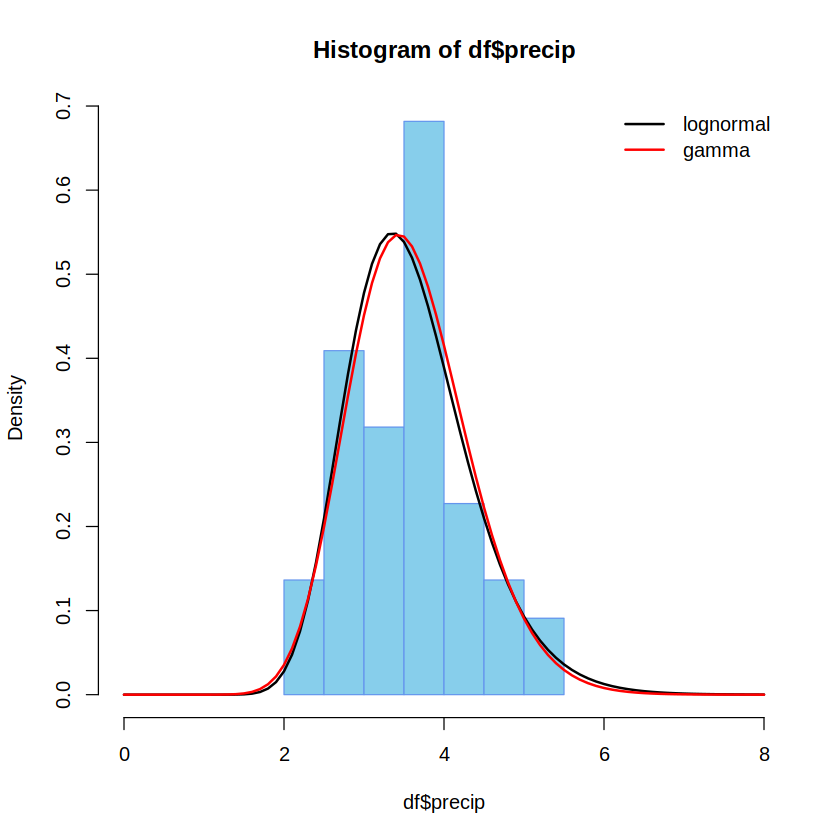

In [16]:
x <- seq(0,8,0.1)
hist(df$precip, col = "skyblue", border = "cornflowerblue", xlim = range(x), prob = T)
lines(x, dlnorm(x, mean(log(df$precip)), sd(log(df$precip))), col = "black", lwd = 2)
lines(x, dgamma(x, shape = gamma_pars["shape"], rate = gamma_pars["rate"]), col = "red", lwd = 2)

legend("topright", c("lognormal", "gamma"), col = c("black", "red"), lty = 1, lwd = 2, bty = "n")

In [17]:
norm_log10 <- fnorm("log10", "gmst", df, type = "fixeddisp", method = "MLE")
norm_logn <- fnorm("logn", "gmst", df, type = "fixeddisp", method = "MLE")
lnorm_pr <- flnorm("precip", "gmst", df, type = "fixeddisp", method = "MLE")

In [18]:
rbind.fill(cbind(varbl = "log10_precip", fit_results(norm_log10, df["2022","log10"], event_gmst, event_gmst - 1.2, lower = T, dI_rel = T)),
           cbind(varbl = "logn_precip", fit_results(norm_logn, df["2022","logn"], event_gmst, event_gmst - 1.2, lower = T, dI_rel = T)),
           cbind(varbl = "lognormal", fit_results(lnorm_pr, df["2022","precip"], event_gmst, event_gmst - 1.2, lower = T, dI_rel = T)))

varbl,mdl,converged,event_value,alpha,loglik,rp_event,rp_alt,pr,delta_I
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
log10_precip,norm_fixeddisp,0,0.3578748,-0.0804600,-43.962293,32.34395,167.4184,5.176189,-15.22020
logn_precip,norm_fixeddisp,0,0.8240372,-0.1852890,-7.264865,32.33866,167.4130,5.176870,-15.22184
lognormal,lnorm_fixeddisp,0,2.2796848,-0.1852729,47.965352,32.33607,167.3542,5.175465,-13.75181
